In [31]:
import numpy as np
import os
import random
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [32]:
DATADIR = "D:/JUPYTER_FILES/JUPYTER FILES/DL_LAB/Others/Brain_tumour_2/dataset/Training"
CATEGORIES=["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]

In [49]:
data=[]
def import_dataset():
    for category in CATEGORIES:
        new_path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(new_path):
            try:
                img_array=cv2.imread(os.path.join(new_path,img))
                img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
                new_img_array=255-img_array
                #new_img_array=img_array-new_img_array

                resized_array=cv2.resize(new_img_array,(150,150))
                data.append([resized_array,class_num])
            except Exception as e:
                pass
import_dataset()

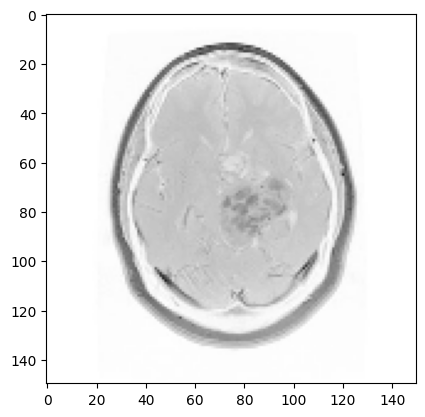

In [50]:
plt.imshow(data[0][0])

In [55]:
TESTDATADIR="D:/JUPYTER_FILES/JUPYTER FILES/DL_LAB/Others/brain_tumor_3/dataset/Testing/"

test_data=[]
def import_test_dataset():
    for category in CATEGORIES:
        path=os.path.join(TESTDATADIR+category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
                img_array=255-img_array
                resized_array=cv2.resize(img_array,(150,150))
                test_data.append([resized_array,class_num])
            except Exception as e:
                pass
import_test_dataset()

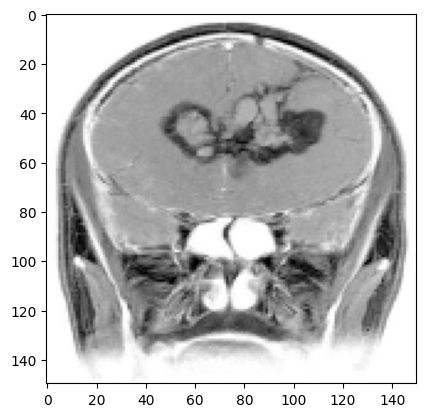

In [56]:
plt.imshow(test_data[0][0])

In [59]:
from tensorflow.keras.utils import to_categorical
x=[]
y=[]
for scan,result in data:
    x.append(scan)
    y.append(result)
x=np.array(x).reshape(-1,150,150,3)
x=x.astype('float32')/255
y=np.array(to_categorical(y))

In [60]:
x=x.astype('float32')/255.0

In [61]:
x_test=[]
y_test=[]
for scan,result in test_data:
    x_test.append(scan)
    y_test.append(result)
x_test=np.array(x_test).reshape(-1,150,150,3)
x_test=x_test.astype('float32')/255

y_test=np.array(y_test)

In [62]:
y_test=np.array(to_categorical(y_test))

In [63]:
print(x.shape)
print(x_test.shape)

(2870, 150, 150, 3)
(394, 150, 150, 3)


In [64]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras import Input
from keras.applications import EfficientNetB0

In [65]:
effnetb0=EfficientNetB0(weights='imagenet',input_shape=x.shape[1:],include_top=False)
model2=Sequential()
model2.add(effnetb0)
model2.add(Dense(150,activation='sigmoid'))
model2.add(Conv2D(70,3,activation='relu',strides=2,padding='same'))
model2.add(MaxPooling2D(pool_size=(3,3)))
model2.add(Dropout(0.4))

model2.add(Flatten())
model2.add(Dense(35,activation='relu'))
model2.add(Dense(14,activation='sigmoid'))
model2.add(Dense(4,activation='softmax'))

model2.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [66]:
effnet_fit=model2.fit(x,y,epochs=15,batch_size=32)

Epoch 1/15
90/90 [==============================] - 311s 3s/step - loss: 1.2604 - accuracy: 0.4171
Epoch 2/15
90/90 [==============================] - 292s 3s/step - loss: 1.0605 - accuracy: 0.5617
Epoch 3/15
90/90 [==============================] - 279s 3s/step - loss: 0.9308 - accuracy: 0.6052
Epoch 4/15
90/90 [==============================] - 286s 3s/step - loss: 0.8838 - accuracy: 0.6237
Epoch 5/15
90/90 [==============================] - 284s 3s/step - loss: 0.7896 - accuracy: 0.6551
Epoch 6/15
90/90 [==============================] - 287s 3s/step - loss: 0.7499 - accuracy: 0.6711
Epoch 7/15
90/90 [==============================] - 305s 3s/step - loss: 0.6927 - accuracy: 0.7160
Epoch 8/15
90/90 [==============================] - 342s 4s/step - loss: 0.7170 - accuracy: 0.7213
Epoch 9/15
90/90 [==============================] - 302s 3s/step - loss: 0.6483 - accuracy: 0.7596
Epoch 10/15
90/90 [==============================] - 288s 3s/step - loss: 0.6089 - accuracy: 0.7798
Epoch 11/